In [3]:
import pandas as pd
import numpy as np
from datetime import datetime


pd.set_option('display.max_rows', 500)

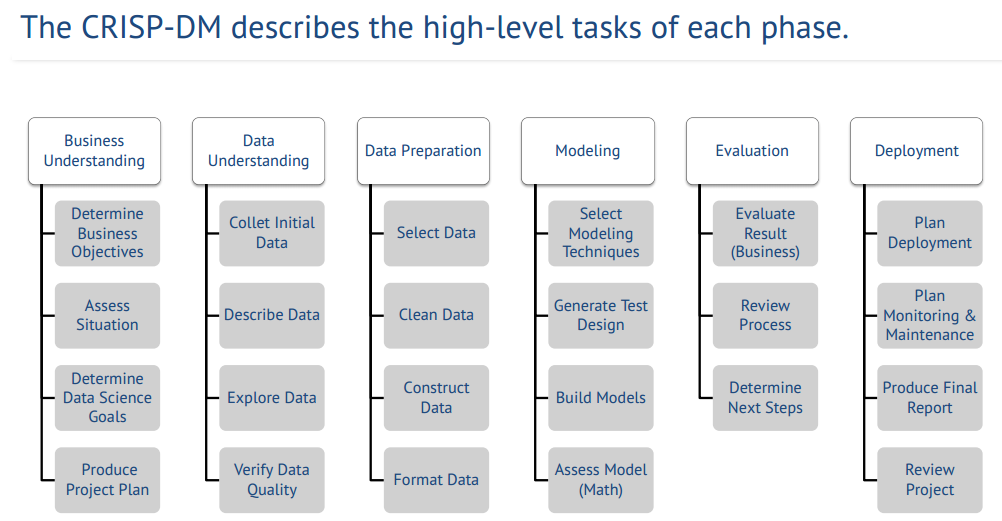

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GIT csv data

In [4]:
data_path = '/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [5]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [6]:
time_idx = pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
len(df_plot)

104

In [9]:
# See individual countries
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [10]:
pd_raw[pd_raw['Country/Region'] == 'Germany'].iloc[:, 4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
120,0,0,0,0,0,1,4,4,4,5,...,156513,157770,158758,159912,161539,163009,164077,164967,165664,166152


* Start analysis first in a small data sets to get a feeling on the data structures

In [11]:
country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [12]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:, 4::].transpose())

In [13]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


* Our first plot

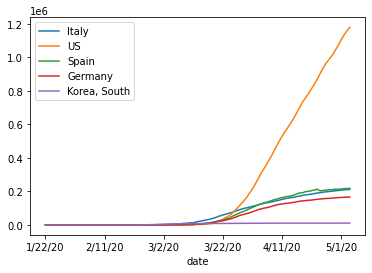

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type : Date

In [15]:
type(df_plot.date[0])

str

* first transform single date string to iso standards

In [16]:
datetime.strptime(df_plot.date[0],"%m/%d/%y") 

datetime.datetime(2020, 1, 22, 0, 0)

In [17]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] # convert to datetime

In [18]:
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] # convert ot ISO norm (str)
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [19]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [21]:
df_plot.to_csv('/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/processed/COVID_small_flat_table.csv', sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes(columns) that uniquely specify a tuple(row) in a relation(table)

A primary key's main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values

In [22]:
data_path = '/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [23]:
# simple renaming: not necessary
pd_data_base = pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})

In [24]:
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [25]:
# We don't need spatial location of countries for now
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,0,0,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,0,0,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [26]:
test_pd = pd_data_base.set_index(['state', 'country']).T

In [27]:
test_pd

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [28]:
test_pd.columns

MultiIndex([(                               nan,           'Afghanistan'),
            (                               nan,               'Albania'),
            (                               nan,               'Algeria'),
            (                               nan,               'Andorra'),
            (                               nan,                'Angola'),
            (                               nan,   'Antigua and Barbuda'),
            (                               nan,             'Argentina'),
            (                               nan,               'Armenia'),
            (    'Australian Capital Territory',             'Australia'),
            (                 'New South Wales',             'Australia'),
            ...
            ('Bonaire, Sint Eustatius and Saba',           'Netherlands'),
            (                               nan,                'Malawi'),
            (     'Falkland Islands (Malvinas)',        'United Kingdom'),
         

In [29]:
pd_relational_model =test_pd.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

In [30]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [31]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [32]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [33]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [34]:
pd_relational_model.to_csv('/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/processed/COVID_relational_confirmed.csv', sep=';')

# Group-by apply

In [35]:
pd_JH_data = pd.read_csv('/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/processed/COVID_relational_confirmed.csv', sep=';', parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data = pd_JH_data.drop(['Unnamed: 0'], axis = 1).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cuba,0.0
2,2020-01-22,Zhejiang,Croatia,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0


In [36]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [37]:
test_data

,date,state,country,confirmed
26641,2020-03-21,Zhejiang,Germany,22213.0
26763,2020-03-21,Zhejiang,US,25600.0
26852,2020-03-21,NaN,Germany,22213.0
26971,2020-03-21,NaN,US,25600.0
27093,2020-03-22,Zhejiang,Germany,24873.0
27213,2020-03-22,Zhejiang,US,33276.0
27303,2020-03-22,NaN,Germany,24873.0
27422,2020-03-22,NaN,US,33276.0
27543,2020-03-23,Zhejiang,Germany,29056.0
27664,2020-03-23,Zhejiang,US,43843.0


In [38]:
test_data.groupby(['country']).agg([np.max]) # inner brackets important

,date,confirmed
,amax,amax
country,,
Germany,2020-05-04,166152.0
US,2020-05-04,1180375.0


In [39]:
# %load /media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result




def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    pd_filtered_result=df_input[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter).reset_index()
    df_output=pd.merge(df_input,pd_filtered_result[['index',filter_on+'_filtered']],on=['index'],how='left')

    return df_output





def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()
    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    df_output=pd.merge(df_input,pd_DR_result[['index',filter_on+'_DR']],on=['index'],how='left')
    return df_output


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [40]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [41]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country       
Zhejiang  Germany  26641           NaN
                   27093           NaN
                   27543      7.417994
                   27995      7.142035
                   28445      8.012983
                   28898      6.954407
                   29347      6.501919
                   29798      7.390371
                   30251     10.136671
                   30700     13.541893
                   31151     13.781393
                   31603     13.140681
                   32053     12.037271
                   32504     12.735506
                   32956     16.052694
                   33406     21.372453
                   33858     27.427355
                   34308     27.511936
                   34760     21.792179
                   35210     21.495848
                   35661     26.565108
                   36114     36.198404
                   36563     43.982990
                   37014     49.423444
                   37466     74.043747


In [42]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [49]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result

,state,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,799,NaN
2,Alberta,Canada,1250,NaN
3,Alberta,Canada,1702,NaN
4,Alberta,Canada,2152,NaN
...,...,...,...,...
27659,Zhejiang,Zimbabwe,44873,8.666667
27660,Zhejiang,Zimbabwe,45267,9.333333
27661,Zhejiang,Zimbabwe,45693,-12.666667
27662,Zhejiang,Zimbabwe,46112,-12.000000


In [44]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,2020-01-22,Zhejiang,Cuba,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0


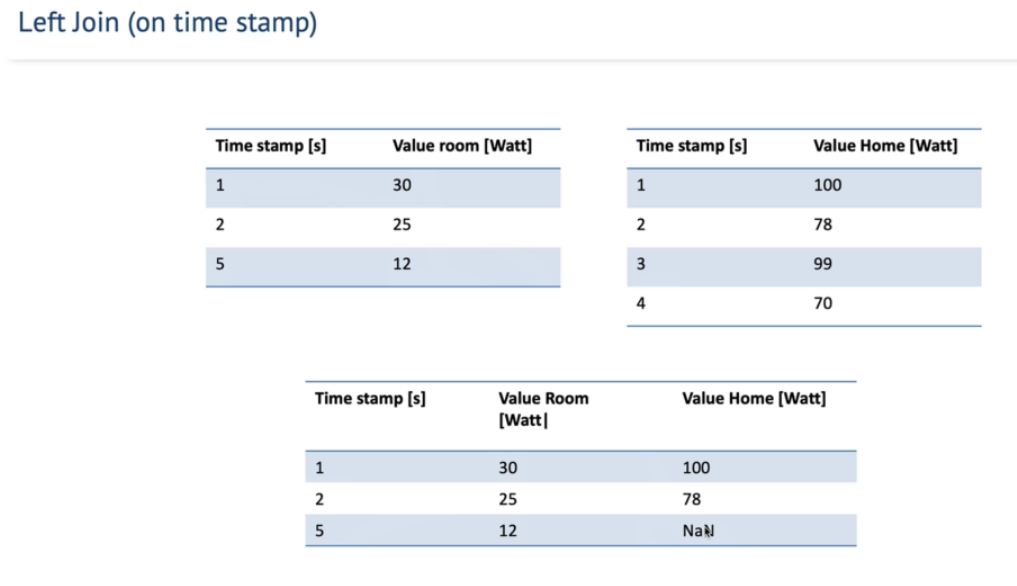

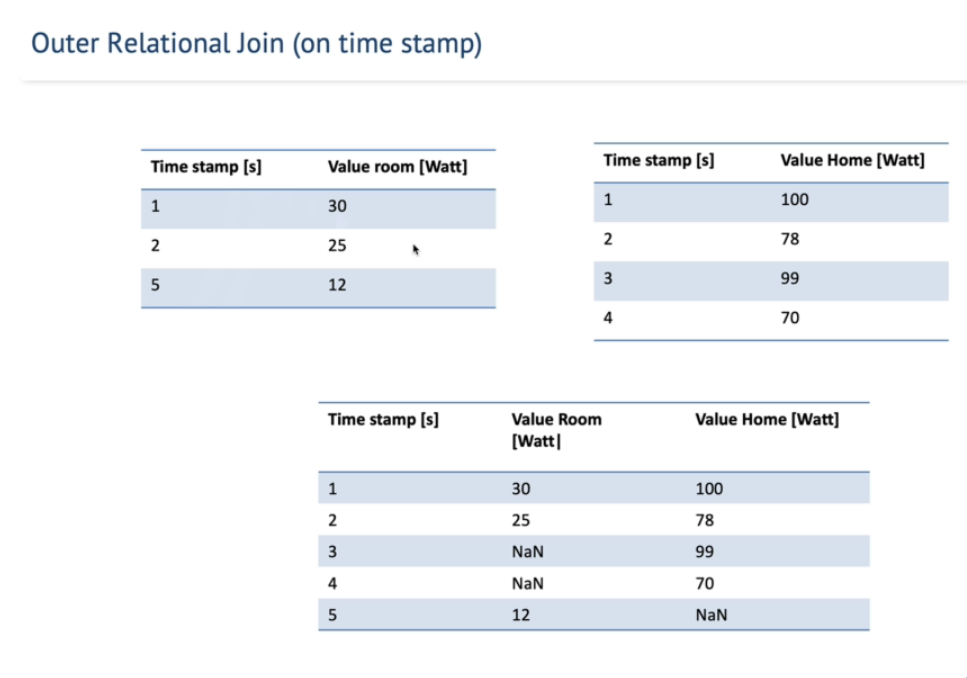

In [50]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')
pd_result_larg

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN
...,...,...,...,...,...,...
46899,46899,2020-05-04,NaN,Sao Tome and Principe,23.0,NaN
46900,46900,2020-05-04,NaN,San Marino,582.0,NaN
46901,46901,2020-05-04,NaN,Saint Vincent and the Grenadines,17.0,NaN
46902,46902,2020-05-04,NaN,Togo,126.0,NaN


## Filter the data with groupby appy

In [51]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [52]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [59]:
pd_filtered_result

,index,state,country,confirmed,confirmed_filtered
0,0,NaN,NaN,NaN,NaN
1,1,Zhejiang,Cuba,0.0,0.0
2,2,Zhejiang,Croatia,0.0,0.0
3,3,Zhejiang,Cote d'Ivoire,0.0,0.0
4,4,Zhejiang,Costa Rica,0.0,0.0
...,...,...,...,...,...
46899,46899,NaN,NaN,NaN,NaN
46900,46900,NaN,NaN,NaN,NaN
46901,46901,NaN,NaN,NaN,NaN
46902,46902,NaN,NaN,NaN,NaN


In [53]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0


## Filtered Doubling Rate

In [54]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})

pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,799,NaN
2,Alberta,Canada,1250,NaN
3,Alberta,Canada,1702,NaN
4,Alberta,Canada,2152,NaN


In [55]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [56]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['doubling_rate_filtered']=pd_result_larg['doubling_rate_filtered'].where(mask, other=np.NaN) 

In [57]:
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [58]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)